# The Solow model with human capial

For this Model project a Solow model will be set up and solved for the optimal amount of capital and labour when affected by the accumulating human capital. Furthermore, we will derive an expression for the real interest rate and the real wage.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
from sympy import Symbol
from sympy.solvers import solve
sm.init_printing(use_unicode=True) # for pretty printing
from IPython.display import display
import matplotlib.pyplot as plt # baseline modul
import ipywidgets as widgets
from types import SimpleNamespace



# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

from modelproject import Solow

model = Solow()
par = model.par
sim = model.sim
value = model.value



# Model description

**The varibles and parameters for this model can be introduced as:**

***Varibles:***
$$Y_t: Production$$
$$L_t: Labour$$
$$K_t: Capital$$
$$A_t: Technology$$
$$H_t: Human capital$$

***Variables per capita:***
$$y_t: Production\: per \:capita$$
$$k_t: Capital \:per \:capita$$
$$h_t: Human \:capital\: per\: capita$$


***Tilde Varibles, which is effective worker per capita***
$$\tilde{y}_t = \frac{Y_t}{A_tL_t}$$
$$\tilde{k}_t = \frac{K_t}{A_tL_t}$$
$$\tilde{h}_t = \frac{H_t}{A_tL_t}$$

The model consists of the following equations:

1. **Cobb-Douglas production function:** $$Y_{t} = K_{t}^\alpha H_{t}^\phi (A_{t}L_{t})^{1-\alpha-\phi}$$
2. **Function for Labour force:** $$L_{t+1} = (1+n) L_{t} $$
3. **Function for the level of technology:** $$ A_{t+1} = (1+g)A_{t} $$
4. **Function for capital:** $$ K_{t+1} = s_{K}Y_{t} + (1-\delta)K_{t} $$
5. **Fucntion for human capital:** $$ H_{t+1} = s_{H}Y_{t} + (1-\delta)H_{t} $$

Where 
$L_0, A_0, K_0$ and $H_0$ is given and $0< \alpha,\sigma<1$

***Parameters***

$ \alpha$: The effect of capital 
$ \phi$: The effect of human capital 
$ n$: Growth rate of the labour force
$ g$: Growth rate of the technology level
$ s_K$: Saving or investment in capital
$ \delta$: Deprisiation rate of physical capital
$ s_H$: Saving or investment in human capital

**Furthermore, more parameters for the model can be derived as:**
$$H_{t} = h_{t}L_{t} $$
$$ S_t =(s_K+s_H)Y_t $$
$$ C_t = Y_t - S_t = (1-s_K-s_H)Y_t  $$

# The purpose

The purpose of the Solow model is to estimate or predict the right mix of capital and labor for a society, so that the country/society will achieve the optimal level of production and thus prosperity. 

The purpose of implementing human capital is to realize the model so that it actually takes into account that the workforce hired is more than physical labor, but also influenced by their education, health, experience and personality. 

## Analytical solution

**When solving the model, we derived the equations for the transition of capital and human capital.** \
This gives an indication of what the future development will look like.

$$\tilde{k}_{t+1}=\frac{s_K\tilde{k}_t^\alpha \tilde{h}_t^\phi + (1-\delta)\tilde{k}_t}{(1+n)(1+g)} $$
And
$$ \tilde{h}_{t+1}=\frac{1}{(1+n)(1+g)}(s_H\tilde{k}_t^\alpha\tilde{h}_t^\phi+(1-\delta)\tilde{h}_t) $$

When using $\tilde{k}_t=\tilde{k}_{t+1}=\tilde{k}^*$ (and so for h) the following Steady State expression can be derived:
$$\tilde{k}^* = (\frac{s_K^{1-\phi}s_H^\phi}{n+g+\delta+ng})^{\frac{1}{1-\alpha-\phi}} $$
$$\tilde{h}^* = (\frac{s_K^\alpha s_H^{1-\alpha}}{n+g+\delta+ng})^{\frac{1}{1-\alpha-\phi}} $$

These equations shows the optimale amount of respectively capital and human capital.
\ Which will lead to the optimal production expressed as:
$$y_t = A_t (\frac{s_K}{n+g+\delta+ng}^{\frac{\alpha}{1-\alpha-\phi}}(\frac{s_H}{n+g+\delta+ng})^{\frac{\phi}{1-\alpha-\phi}}$$

**Moreover it could be interesting to show the dynamic in the model. This can be done by finding the nullclines. The nullclines is found by solving the transitions equations and isolate them w.r.t $\:h_t$** 

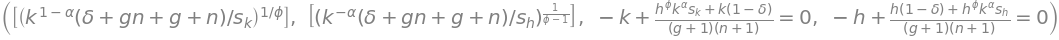

In [2]:
# Solving the model for the steady state and finding the nullclines

model = Solow()

model.solve_analytical()



The first two expressions are the nullclines for ∆k=0 and ∆h=0. \
The last two expressions are the SS. These expression can be rewritten to ones shown above in this analytical section.



# Numerical Solution


We want to plot the nullclines, to show the dynamic and how the model will convert towards a Steady state.

TypeError: Cannot convert expression to float

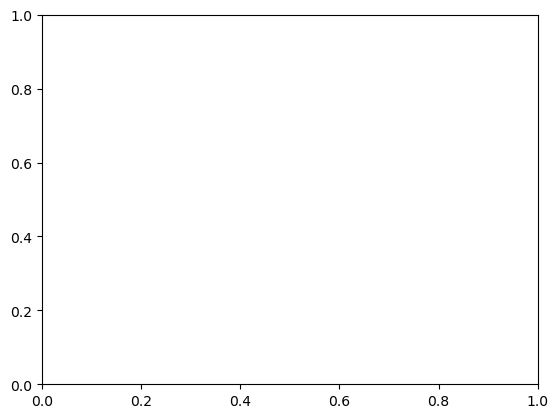

In [6]:
# Plotting the nullclines
model.plot_nullclines()



In [ ]:
sim = model.sim
value = model.value


model.simulate()

In [ ]:
simT_fig = 200 # first 100 periods
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(simT_fig),sim.y_tilde[:simT_fig],label='$\\tilde{y}_t$')
ax.plot(np.arange(simT_fig),sim.k_tilde[:simT_fig],label='$\\tilde{k}_t$')
ax.plot(np.arange(simT_fig),sim.h_tilde[:simT_fig],label='$\\tilde{h}_t$')
ax.set_xlabel('time')
ax.legend(frameon=True);

**We have simulated the model and would like to compare this to the hypothetical scenarios**

In [ ]:
# We get the results from the simulation we ran above
model.calc_moms()

# We define the error as the difference between the hypothetical scenarios compared to the simulation results
error = model.calc_difference_to_hypo(do_print=True)

**Autocorrelation in k_tilde and h_tilde seems to be 1, which is not a surpring result.
The reason for this is that we have only given the model 1 dataset for 1 period. All other 199 periods are self-constructed through the model simulation and will most likely perfectly correlate with the last period as it is a theoritical model not based on reality. Furthermore, there are no present shocks in the model so that the model is perfect without any "noise".**

**Defining or creating the variables and parameters in Python**

Setting up the equations for the transition and making python solve for the equilibrium.

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 